<h1><center>Housing</h1></center><br/>
<p>
    <i>Esse Projeto tem como objetivo descrever o preço médio dos imóveis do estado da Californio (EUA).</i><br/>
    <i>Seram usadas tecnicas estatisticas e ML, para tal obejtivo.</i><br/>
    <ul>
        <li>Impotação das bibliotecas e dos dados</li>
        <li>Estatistica Descritiva</li>
        <li>Plótagem dos Histogramas</li>
        <li>Separação dos Dados</li>
        <li>Categorização das Médias de Rendas Mensais</li>
        <li>Amostragem Estratificada</li>
        <li>Visualização dos Dados</li>
        <li>Buscando Correlações Entre as Variavies</li>
    </ul>
</p>

In [7]:
#Impotando Bibliotecas utilizadas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Importando dados.
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h3>Estatistica Descritiva </h3>

In [3]:
df.info() #Informações sobre os dados - seus tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*Única coluna que não possue um tipo float64 foi a 'ocean_proximity', que é a proximidade do litoral*

In [4]:
df["ocean_proximity"].value_counts() #Os tipos de respostas que temos dentro da coluna 'ocean_proximity'

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.describe()#Analise estatistica dos dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


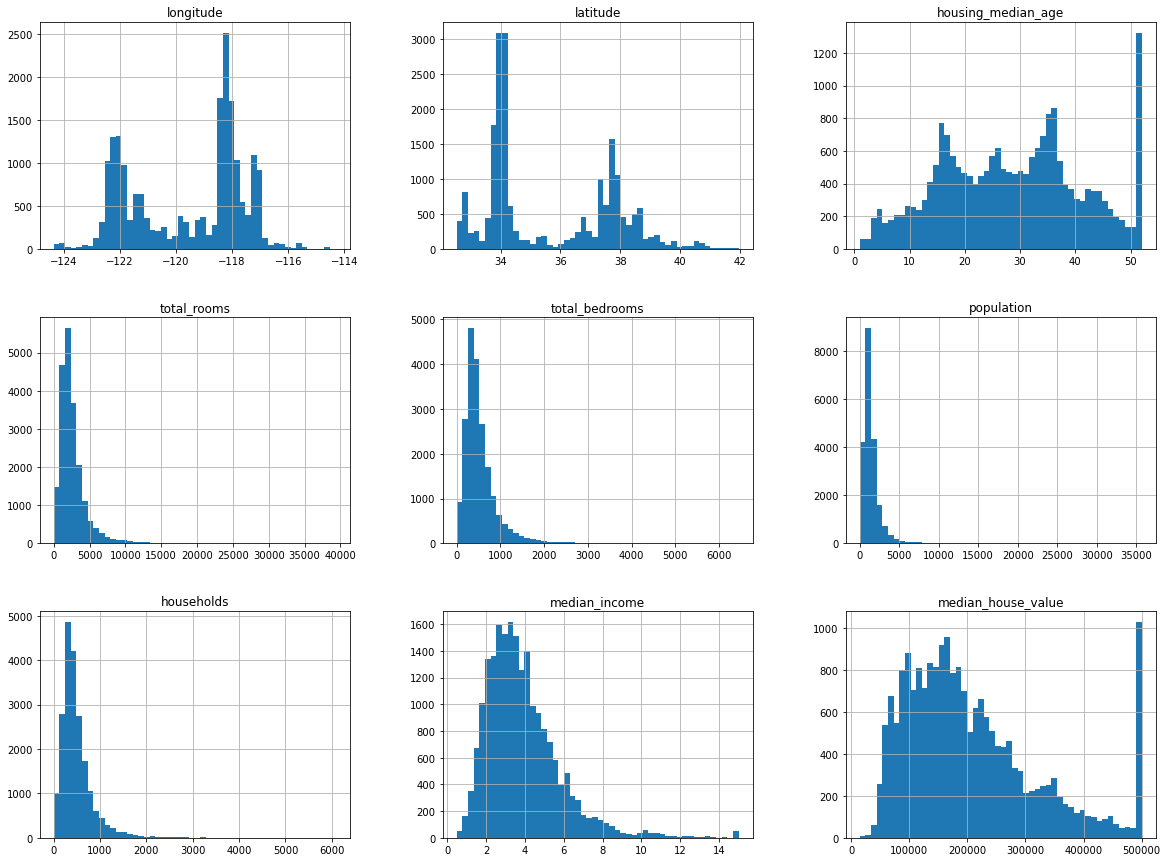

In [8]:
#Plotagem de histograma com todas as colunas do dataset.
df.hist(bins=50, figsize=(20,15))
plt.show()

<h3>Separação da Base de Dados com Sklearn</h3>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
#quantidade de dados separados para treino
len(train_set)

16512

In [12]:
#quantidade de dados separados para teste
len(test_set)

4128

*Vamos seprar a coluna 'median_income', como sendo um fator que pode ser muito determinante dentro dos que quesitos que poderiam estimar os valores do imóveis.<br/>*
*Com esses dados de renda media, vamos criar uma categoria de ate 5 niveis e adicionar como uma coluna no dataset.*

In [13]:
df["income_cat"] = pd.cut(df["median_income"],
                         bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                         labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

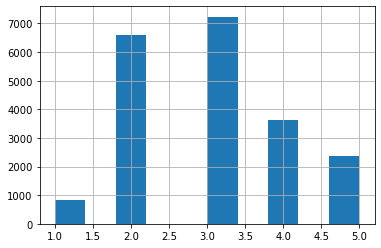

In [14]:
df["income_cat"].hist()

<h3>Amostragem Estratificada</h3>

*Vamos analisar a proporção da amostra que ficou em cada grupo, isso é muito importante pós devemos sempre analisar uma amostra que realmente represente a população estudada*

In [15]:
#StratifiedShuffleSplit esta dentro do sklearn, e a função que realizar essa amostragem
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [17]:
#Analise de proporção da categoria de renda no conjunto de testes:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<h3>Visualização dos Dados</h3>

In [19]:
#Criação da uma copia de um conjunto de treino
df_train = strat_train_set.copy()

<h6>Visulizando Dados Geograficos</h6>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

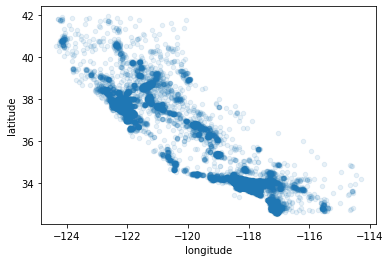

In [20]:
#Visualizando dados geograficos com a latitude e longitude.
#atribuição de alpha facilita a visualiação das areas de alta densidade.
df_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

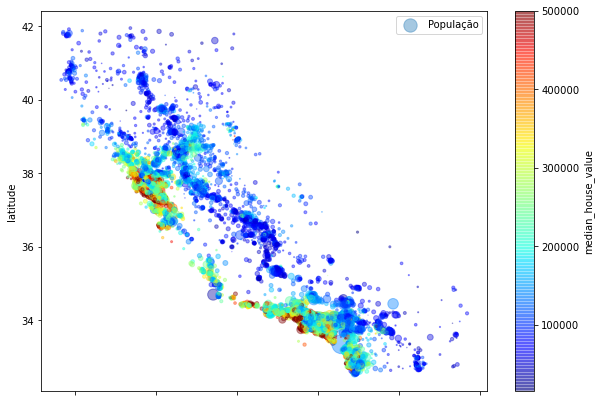

In [21]:
#POpulação da região representada pelo opção 's', e o preço pelo opção 'c'.
#opção 'jet', varia cores do azul para valores baixos e vermelho para valores altos.

df_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df_train["population"]/100, label="População", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             )
plt.legend()

*Nessa Imagem vemos como os preços dos imoveis está muito relacionado a proximidade do mar e a densidade populacional.(Lembrando que esses dados são do estado da California, EUA).*

<h3>
Buscando Correlação
</h3>

In [22]:
corr_matrix = df_train.corr()

In [23]:
#Vejamos o quanto cada atributo se correlaciona com o valor médio de um imóvel.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

*Coeficiente de Correlação varia de -1 a 1. Proximo de 1 significa uma forte correlação positiva, e quando esta perto -1, uma forte correlação negativa.
Podemos ver que existe uma forte correlação negativa entra a latitude é o preço médio da casa, significando que quanto mais ao norte, mais baixo o valor.*

In [24]:
#Função do panadas que plota qualquer atributo númerico em realção a outro.
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

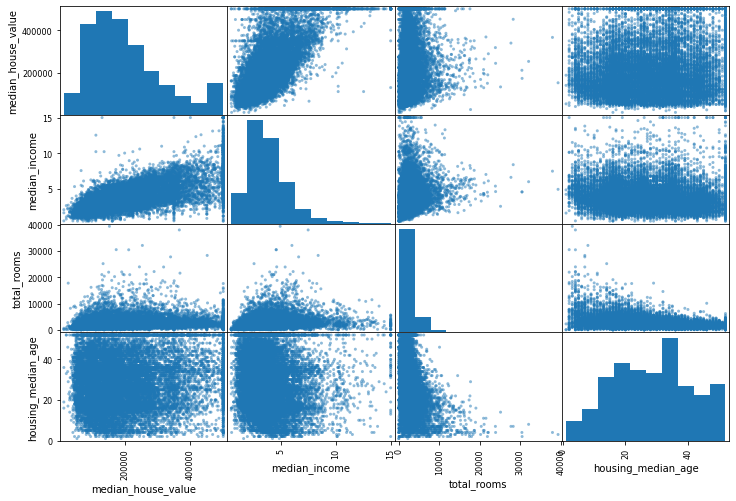

In [25]:
attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(df_train[attributes], figsize=(12, 8))

*O atributo mais promissor para prevermos o preço dos imóveis é o 'median_income'.
Vamos plotar ele em um grafico de disperção.*

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

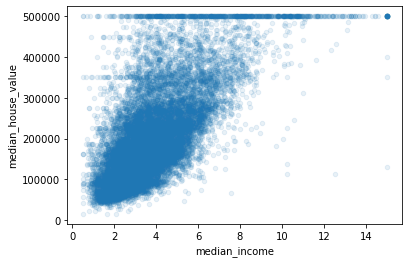

In [26]:
df_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

*Nessa Plótagem podemos ver uma forte correlação positiva entra as duas variaveis*